<a href="https://colab.research.google.com/github/codingiamnot/PMP-2024/blob/main/Partial/pmp_partial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

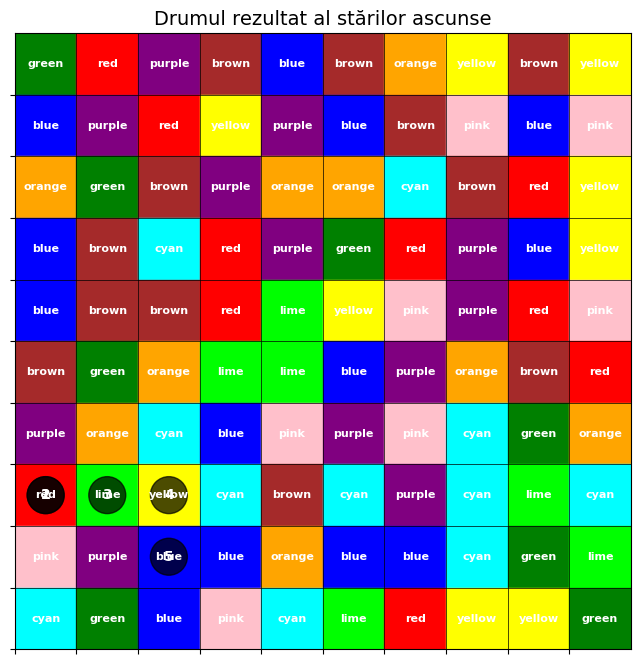

In [11]:
##ex 1, subpunctul 1

%pip install hmmlearn

from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = np.array(["red", "red", "lime", "yellow", "blue"])
####

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]

    id = stare_to_idx[(i, j)]
    transitions[id][id] = 0.25

    for idVec in vecini_valizi:
      transitions[id][idVec] = (1 - 0.25) / len(vecini_valizi)

######

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))

for i, j in stari_ascunse:
  culoareText = grid_culori[i][j]

  idStare = stare_to_idx[(i, j)]
  idCuloare = culoare_to_idx[culoareText]

  emissions[idStare][idCuloare] = 1
######

# Modelul HMM

model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob_ = np.array([1/numar_stari for i in range(0, numar_stari)])
model.transmat_ = transitions
model.emissionprob_ = emissions

######

# Rulăm algoritmul Viterbi pentru secvența de observații
observations_sequence = np.array(observatii_idx)
observations_sequence = observations_sequence.reshape(1, -1)

log_probability, secventa_stari = model.decode(observations_sequence,
                                              lengths = 1,
                                              algorithm ='viterbi')


######

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

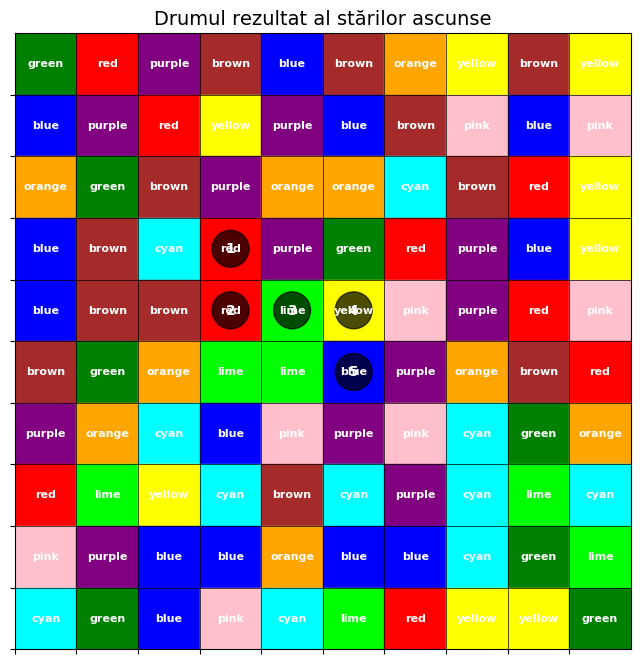

In [12]:
##ex 1, subpunctul 2

%pip install hmmlearn

from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = np.array(["red", "red", "lime", "yellow", "blue"])
####

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]

    id = stare_to_idx[(i, j)]

    for idVec in vecini_valizi:
      transitions[id][idVec] = 1 / len(vecini_valizi)

######

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))

for i, j in stari_ascunse:
  culoareText = grid_culori[i][j]

  idStare = stare_to_idx[(i, j)]
  idCuloare = culoare_to_idx[culoareText]

  emissions[idStare][idCuloare] = 1
######

# Modelul HMM

model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob_ = np.array([1/numar_stari for i in range(0, numar_stari)])
model.transmat_ = transitions
model.emissionprob_ = emissions

######

# Rulăm algoritmul Viterbi pentru secvența de observații
observations_sequence = np.array(observatii_idx)
observations_sequence = observations_sequence.reshape(1, -1)

log_probability, secventa_stari = model.decode(observations_sequence,
                                              lengths = 1,
                                              algorithm ='viterbi')


######

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

Output()

Output()

<Axes: title={'center': 'p'}>

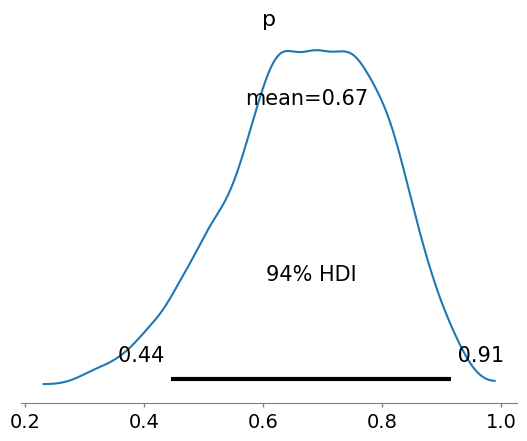

In [17]:
###ex3, subpunctul 1

import pymc as pm
import numpy as np

import arviz as az


obs = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1]

with pm.Model() as model:
  p = pm.Beta("p", alpha=1, beta=1)
  obs = pm.Categorical("obs", p=[1-p, p], observed=obs)
  sample = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=1720357)

az.plot_posterior(sample, var_names=["p"], round_to=2)


Output()

Output()

<Axes: title={'center': 'p'}>

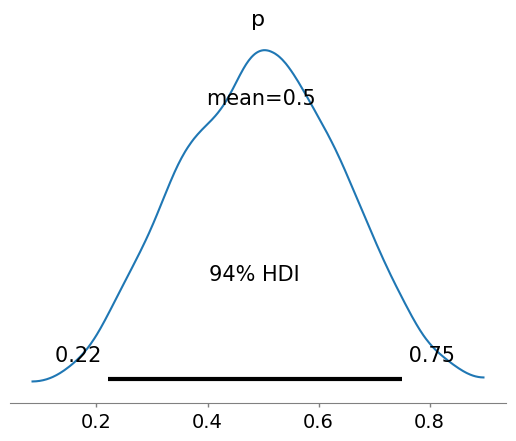

In [20]:
### 3.2.a

import pymc as pm
import numpy as np

import arviz as az


obs = [0, 0, 1, 0, 1, 1, 0, 1, 1, 0]

with pm.Model() as model:
  alpha = pm.Exponential("a", lam=2)
  beta = pm.Exponential("b", lam=2)

  p = pm.Beta("p", alpha=alpha, beta=beta)
  obs = pm.Categorical("obs", p=[1-p, p], observed=obs)
  sample = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=1720357)

az.plot_posterior(sample, var_names=["p"], round_to=2)

<Axes: title={'center': 'p'}>

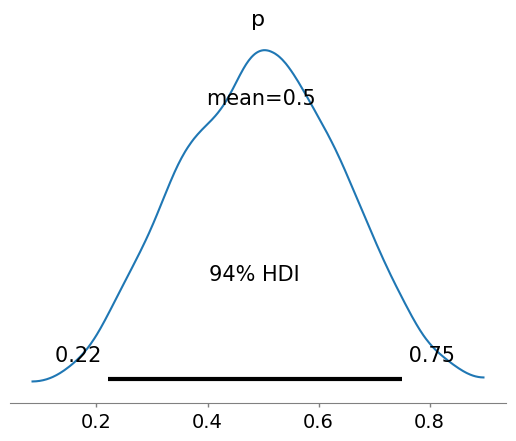

In [23]:
## 3.2.b

import pymc as pm
import numpy as np

import arviz as az


obs1 = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
obs2 = [0, 0, 1, 0, 1, 1, 0, 1, 1, 0]

with pm.Model() as model:
  p1 = pm.Beta("p1", alpha=1, beta=1)
  obs1 = pm.Categorical("obs1", p=[1-p1, p1], observed=obs1)

  obs2 = pm.Categorical("obs2", p=[1-p1, p1], observed=obs2)

az.plot_posterior(sample, var_names=["p"], round_to=2)